In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df = pd.read_csv("movies.csv")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data = data.merge(df,on='movieId', how='left') #merging two datasets
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [5]:
#using groupby function to make the group according to movies and their ratings
Average_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
Average_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [6]:
#counting the no. of items in each rating for each movies
Average_ratings['Total Ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


Text(0.5, 0, 'Average Rating')

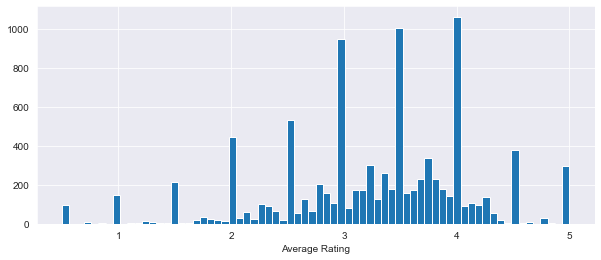

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('dark')  
# plot graph of 'Average_ratings' column 
plt.figure(figsize =(10, 4)) 
Average_ratings['rating'].hist(bins = 70)
plt.xlabel("Average Rating")

Text(0.5, 0, 'Total Number Of Ratings')

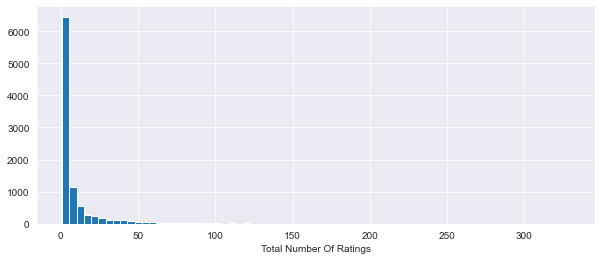

In [8]:
# ploting graph of 'Total Rating column'
sns.set_style('dark')  
plt.figure(figsize =(10, 4))   
Average_ratings['Total Ratings'].hist(bins = 70) 
plt.xlabel("Total Number Of Ratings")

In [9]:
#creating a table where rows are user ids and the columns represent the movies
movie_user = data.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#finding the correlations
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head()

c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [11]:
recommendation_sys = pd.DataFrame(correlations,columns=['Correlation'])
recommendation_sys.dropna(inplace=True)
recommendation_sys = recommendation_sys.join(Average_ratings['Total Ratings'])
recommendation_sys.head()


,Correlation,Total Ratings
title,,
"'burbs, The (1989)",0.240563,17
(500) Days of Summer (2009),0.353833,42
*batteries not included (1987),-0.427425,7
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),-0.285732,14


In [12]:
#Testing the Recommendation System
print("Top Recommendation for Toy Story (1995) are :- ")
recc_test = recommendation_sys[recommendation_sys['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
recc_test.head()

Top Recommendation for Toy Story (1995) are :- 


,title,Correlation,Total Ratings
0,Toy Story (1995),1.000000,215
1,"Incredibles, The (2004)",0.643301,125
2,Finding Nemo (2003),0.618701,141
3,Aladdin (1992),0.611892,183
4,"Monsters, Inc. (2001)",0.490231,132


In [13]:
correlations_1 = movie_user.corrwith(movie_user['Incredibles, The (2004)'])
recommendation_Incredibles = pd.DataFrame(correlations_1,columns=['Correlation'])
recommendation_Incredibles.dropna(inplace=True)
recommendation_Incredibles = recommendation_Incredibles.join(Average_ratings['Total Ratings'])
print("Top Recommendation for Incredibles, The (2004) are :- ")
recc_test1 = recommendation_Incredibles[recommendation_Incredibles['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
recc_test1.head()

c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Top Recommendation for Incredibles, The (2004) are :- 


,title,Correlation,Total Ratings
0,"Incredibles, The (2004)",1.000000,125
1,Toy Story (1995),0.643301,215
2,Finding Nemo (2003),0.561018,141
3,"Monsters, Inc. (2001)",0.544516,132
4,Die Hard: With a Vengeance (1995),0.498532,144
